In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Algerian_forest_fires_dataset_cleaned.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [5]:
df.drop(["day","month","year"],axis = 1,inplace = True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [8]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
## independent and dependent features
x =df.drop(["FWI"],axis = 1)
y = df["FWI"]

In [11]:
## trian test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [12]:
## feature selection based on corr
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

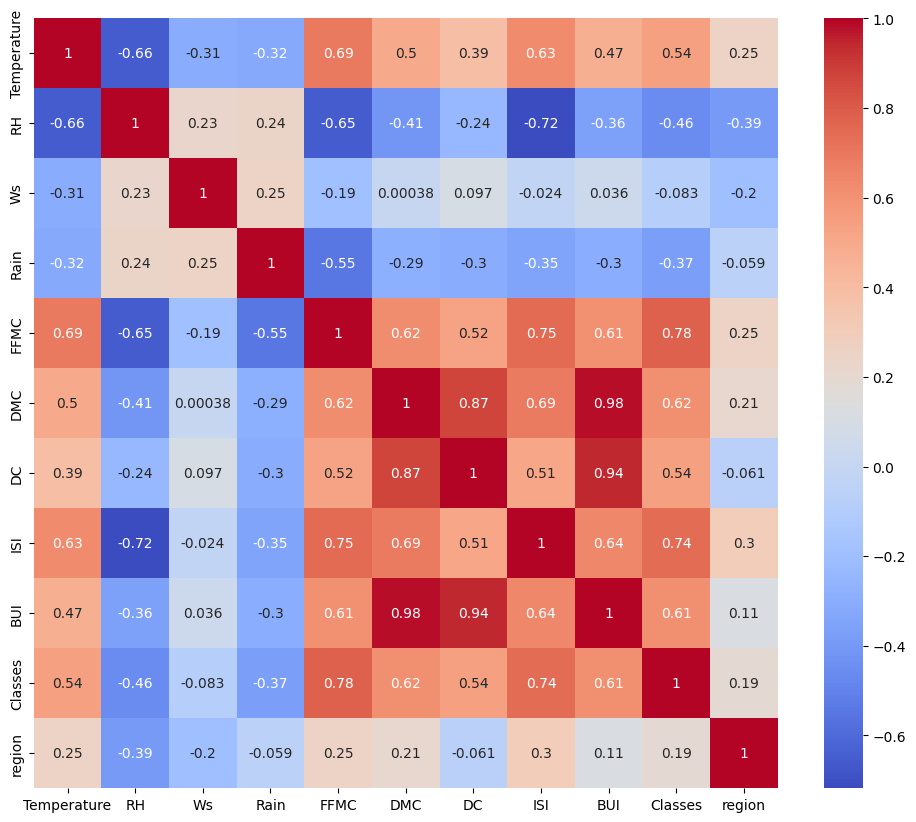

In [13]:
## check for multicollinearity
plt.figure(figsize = (12,10))
corr = x_train.corr()
sns.heatmap(corr,annot = True,cmap = "coolwarm")    

In [14]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [15]:
## threshold -- setted by domain expert
corr_features = correlation(x_train,0.85)

In [16]:
## drop these features
x_train.drop(corr_features,axis = 1,inplace = True)
x_test.drop(corr_features,axis = 1,inplace = True)

In [17]:
x_train.shape, x_test.shape

((182, 9), (61, 9))

In [18]:
## Feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

NameError: name 'X_train_scaled' is not defined

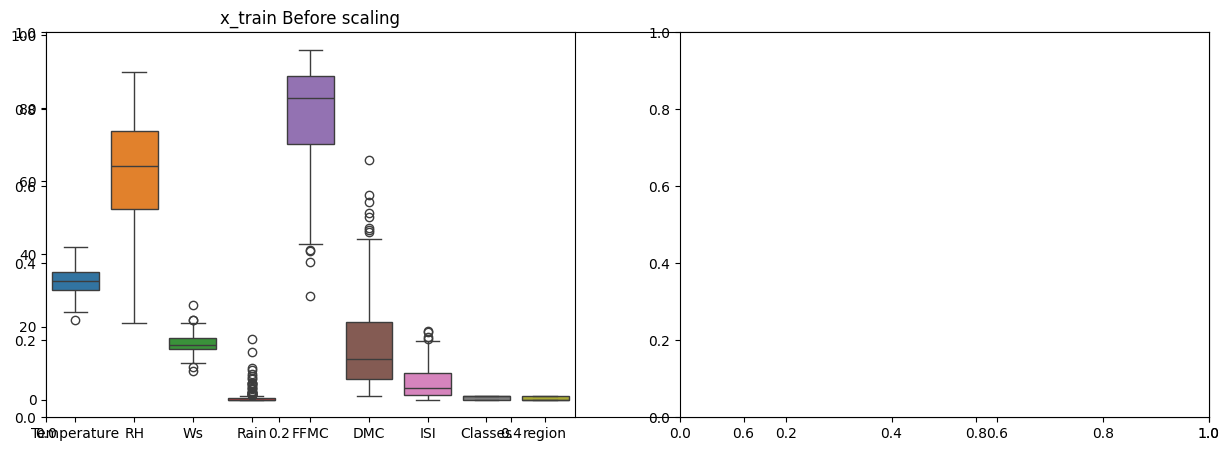

In [19]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title("x_train Before scaling")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("x_train After scaling")

## linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled,y_train)

In [ ]:
y_pred = model.predict(x_test_scaled)


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
## lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred_lasso = lasso.predict(x_test_scaled)
score_lasso = r2_score(y_test,y_pred_lasso)
print(score_lasso)

In [ ]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(x_train_scaled,y_train)

In [ ]:
lassocv.predict(x_test_scaled)

In [ ]:
lassocv.alpha_

In [ ]:
y_pred = lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)

In [ ]:
score1 = r2_score(y_test,y_pred)
print(score1)

In [ ]:
plt.scatter(y_test,y_pred_lasso)

In [ ]:
## ridge regression model
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred_ridge = ridge.predict(x_test_scaled)
score_ridge = r2_score(y_test,y_pred_ridge)
print(score_ridge)

In [ ]:
plt.scatter(y_test,y_pred_ridge)

In [ ]:
## Elasticnet
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(x_train_scaled,y_train)
y_pred_elasticnet = elasticnet.predict(x_test_scaled)
score_elasticnet = r2_score(y_test,y_pred_elasticnet)
print(score_elasticnet)

In [ ]:
plt.scatter(y_test,y_pred_elasticnet)

In [ ]:
import pickle
pickle.dump(ridge,open("ridge.pkl","wb"))
pickle.dump(scaler,open("scaler.pkl","wb"))